# **First model for the project**

# **Load lib**

In [4]:
!pip install pyvi > /dev/null 2>&1
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, GRU, Input,MaxPooling1D, GlobalMaxPooling1D, LayerNormalization, Conv1D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from pyvi import ViUtils

# **Load data**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/hungitnoi/model-for-project/refs/heads/master/s.csv')
label_mapping = {
    -1: "ti√™u c·ª±c",
    0: "trung l·∫≠p",
    1: "t√≠ch c·ª±c"
}
df['label'] = df['label'].map(label_mapping)
df


Unnamed: 0                                            comment     label
0               0                                     √Åo bao ƒë·∫πp ·∫°!!  t√≠ch c·ª±c
1               1                                        Tuy·ªát v·ªùi !  t√≠ch c·ª±c
2               2                         2day ao khong giong trong.  ti√™u c·ª±c
3               3                        M√πi th∆°m,b√¥i l√™n da m·ªÅm da.  t√≠ch c·ª±c
4               4                                  V·∫£i ƒë·∫πp, d√†y d·∫∑n.  t√≠ch c·ª±c
...           ...                                                ...       ...
31455       31455                                   Kh√¥ng ƒë√°ng ti·ªÅn.  ti√™u c·ª±c
31456       31456                                      Qu·∫ßn r·∫•t ƒë·∫πp.  t√≠ch c·ª±c
31457       31457                            H√†ng ƒë·∫πp ƒë√∫ng gi√° ti·ªÅn.  t√≠ch c·ª±c
31458       31458                                   Ch·∫•t v·∫£i kh√° ·ªïn.  t√≠ch c·ª±c
31459       31459  √°o r·∫•t ok nh√© , v·∫£i m·ªãn , len cao c·ªï n√†y ph·ªëi ...  t√≠ch c·ª±c

[31460 rows x 3 columns]

# **Data preparation and preprocessing for tranning**

## data separation as Input_label and input_data



### Input_label: target variable

In [6]:
Input_label = df['label']
Input_label

0        t√≠ch c·ª±c
1        t√≠ch c·ª±c
2        ti√™u c·ª±c
3        t√≠ch c·ª±c
4        t√≠ch c·ª±c
           ...   
31455    ti√™u c·ª±c
31456    t√≠ch c·ª±c
31457    t√≠ch c·ª±c
31458    t√≠ch c·ª±c
31459    t√≠ch c·ª±c
Name: label, Length: 31460, dtype: object

### input_data: data features

In [7]:
input_data = df['comment']
input_data

0                                           √Åo bao ƒë·∫πp ·∫°!!
1                                              Tuy·ªát v·ªùi !
2                               2day ao khong giong trong.
3                              M√πi th∆°m,b√¥i l√™n da m·ªÅm da.
4                                        V·∫£i ƒë·∫πp, d√†y d·∫∑n.
                               ...                        
31455                                     Kh√¥ng ƒë√°ng ti·ªÅn.
31456                                        Qu·∫ßn r·∫•t ƒë·∫πp.
31457                              H√†ng ƒë·∫πp ƒë√∫ng gi√° ti·ªÅn.
31458                                     Ch·∫•t v·∫£i kh√° ·ªïn.
31459    √°o r·∫•t ok nh√© , v·∫£i m·ªãn , len cao c·ªï n√†y ph·ªëi ...
Name: comment, Length: 31460, dtype: object

###Processing data

In [8]:
label_dict = {'ti√™u c·ª±c':0, 'trung l·∫≠p':1, 't√≠ch c·ª±c':2}

input_pre=[]
label_with_accent=[]
for idx,dt in enumerate(input_data):
  input_text_pre=list(tf.keras.preprocessing.text.text_to_word_sequence(dt))
  input_text_pre=" ".join(input_text_pre)
  input_text_pre_no_accent=str(ViUtils.remove_accents(input_text_pre).decode("utf-8"))
  input_text_pre_accent=ViTokenizer.tokenize(input_text_pre)
  input_text_pre_no_accent=ViTokenizer.tokenize(input_text_pre_no_accent)
  input_pre.append(input_text_pre_accent)
  input_pre.append(input_text_pre_no_accent)
  label_with_accent.append(Input_label[idx])
  label_with_accent.append(Input_label[idx])

<function matplotlib.pyplot.show(close=None, block=None)>

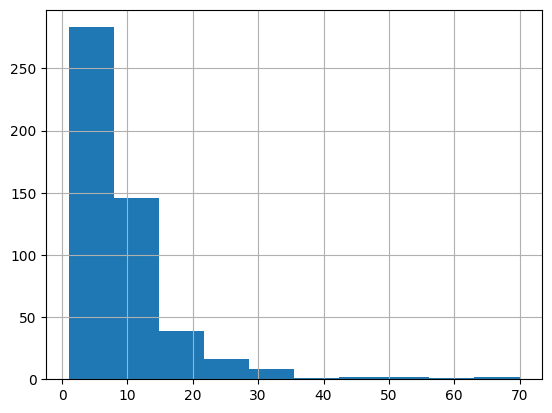

In [9]:
seq_len= [len(i.split()) for i in input_pre[0:500]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

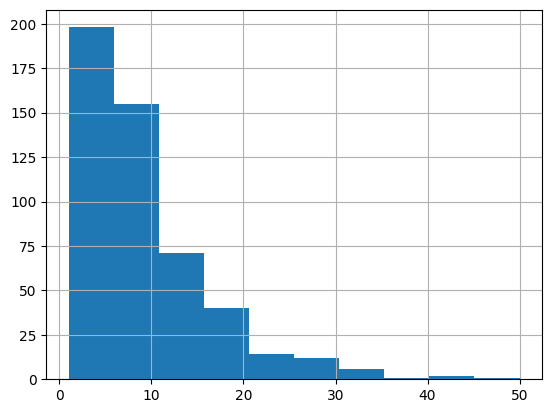

In [10]:
seq_len= [len(i.split()) for i in input_pre[500:1000]]
pd.Series(seq_len).hist(bins=10)
plt.show


In [11]:
seq_len= [len(i.split()) for i in input_pre[1000:1500]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

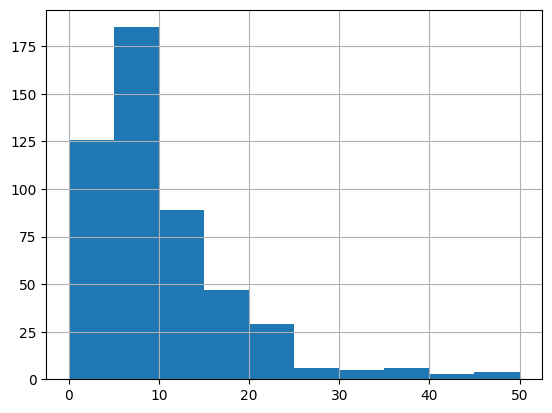

In [12]:
seq_len= [len(i.split()) for i in input_pre[1500:2000]]
pd.Series(seq_len).hist(bins=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

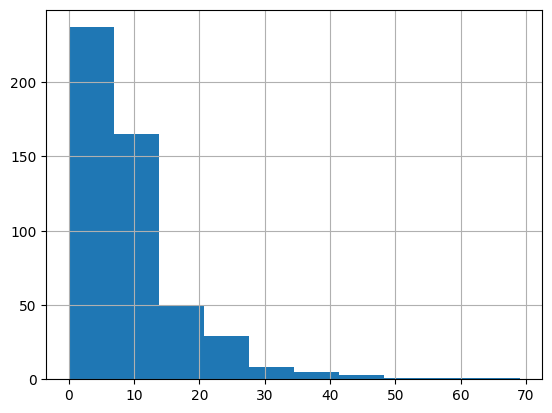

In [13]:
seq_len= [len(i.split()) for i in input_pre[2000:2500]]
pd.Series(seq_len).hist(bins=10)
plt.show

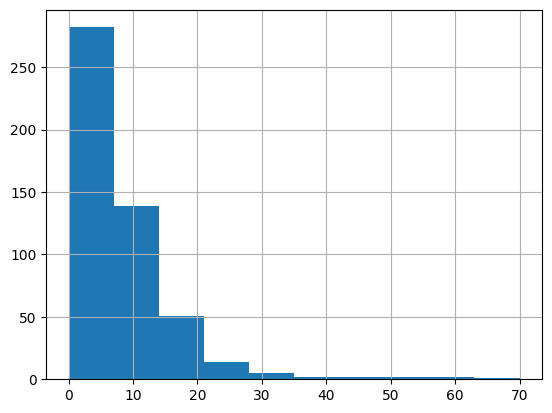

In [14]:
seq_len= [len(i.split()) for i in input_pre[2500:3000]]
pd.Series(seq_len).hist(bins=10)
plt.show()

In [15]:
#As we see over 6 chart, the mean of word in 1 sentenc is about 335 words, so we use it!
lable_idx=[label_dict[i] for i in label_with_accent]
lable_tf=tf.keras.utils.to_categorical(lable_idx,num_classes=3)

tokenizer_data=Tokenizer(oov_token='<OOV>', filters='',split= ' ')
tokenizer_data.fit_on_texts(input_pre)

tokenized_data_text = tokenizer_data.texts_to_sequences(input_pre) #Change text_to_word_sequence to text_to_sequences
vec_data = pad_sequences(tokenized_data_text, padding='post', maxlen=335)

pickle.dump(tokenizer_data, open("tokenizer_data.pkl", "wb"))

print("input data.shape",vec_data.shape)
data_vocab_size=len(tokenizer_data.word_index)+1
print("data_vocab_size",data_vocab_size)

x_train,x_val,y_train,y_val=train_test_split(vec_data,lable_tf,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=42)
print("Training sample",len(x_train))
print("Validation sample",len(x_val))
print("Test sample",len(x_test))

input data.shape (62920, 335)
data_vocab_size 9913
Training sample 45302
Validation sample 12584
Test sample 5034


##Create Model from Scracth

In [22]:
def generate_model():
    dropout_threshold = 0.4
    input_dim = data_vocab_size
    output_dim = 32
    input_length = 335
    initializer = tf.keras.initializers.GlorotNormal()
    #regularizer = tf.keras.regularizers.l2(0.01)  # Add L2 regularization

    input_layer = Input(shape=(input_length,))
    feature = Embedding(input_dim=input_dim, output_dim=output_dim,
                        input_length=input_length, embeddings_initializer="GlorotNormal")(input_layer)

    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)
    cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(cnn_feature)
    cnn_feature = MaxPooling1D()(cnn_feature)
    cnn_feature = LayerNormalization()(cnn_feature)
    cnn_feature = Dropout(dropout_threshold)(cnn_feature)

    bi_lstm_feature = Bidirectional(LSTM(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)

    bi_lstm_feature = Bidirectional(GRU(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(bi_lstm_feature)
    bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
    bi_lstm_feature = LayerNormalization()(bi_lstm_feature)

    combine_feature = tf.keras.layers.Concatenate()([cnn_feature, bi_lstm_feature])
    combine_feature = GlobalMaxPooling1D()(combine_feature)
    combine_feature = LayerNormalization()(combine_feature)

    classifier = Dense(90, activation='relu')(combine_feature)
    classifier = Dropout(0.2)(classifier)  # Adjusted Dropout rate
    classifier = Dense(70, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(50, activation='relu')(classifier)
    classifier = Dropout(0.2)(classifier)
    classifier = Dense(30, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    # classifier = Dense(20, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    # classifier = Dense(10, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    # classifier = Dense(5, activation='relu')(classifier)
    # classifier = Dropout(0.2)(classifier)
    classifier = Dense(3, activation='softmax')(classifier)
    model = tf.keras.Model(inputs=input_layer, outputs=classifier)

    return model

model = generate_model()
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_2             ‚îÇ (None, 335)            ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_2 (Embedding)   ‚îÇ (None, 335, 32)        ‚îÇ        317,216 ‚îÇ input_layer_2[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_4 (Conv1D)         ‚îÇ (None, 335, 32)        ‚îÇ          3,104 ‚îÇ embedding_2[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_8           ‚îÇ (None, 167, 32)        ‚îÇ              0 ‚îÇ conv1d_4[0][0]         ‚îÇ
‚îÇ (MaxPooling1D)            ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_18 (Dropout)      ‚îÇ (None, 167, 32)        ‚îÇ              0 ‚îÇ max_pooling1d_8[0][0]  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_4           ‚îÇ (None, 335, 64)        ‚îÇ         16,640 ‚îÇ embedding_2[0][0]      ‚îÇ
‚îÇ (Bidirectional)           ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_5 (Conv1D)         ‚îÇ (None, 167, 32)        ‚îÇ          3,104 ‚îÇ dropout_18[0][0]       ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling1d_10          ‚îÇ (None, 167, 64)        ‚îÇ              0 ‚îÇ bidirectional_4[0][0]  ‚îÇ
‚îÇ (MaxPooling1D)            ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚î

 Total params: 379,537 (1.45 MB)

 Trainable params: 379,537 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

##Visualize the model

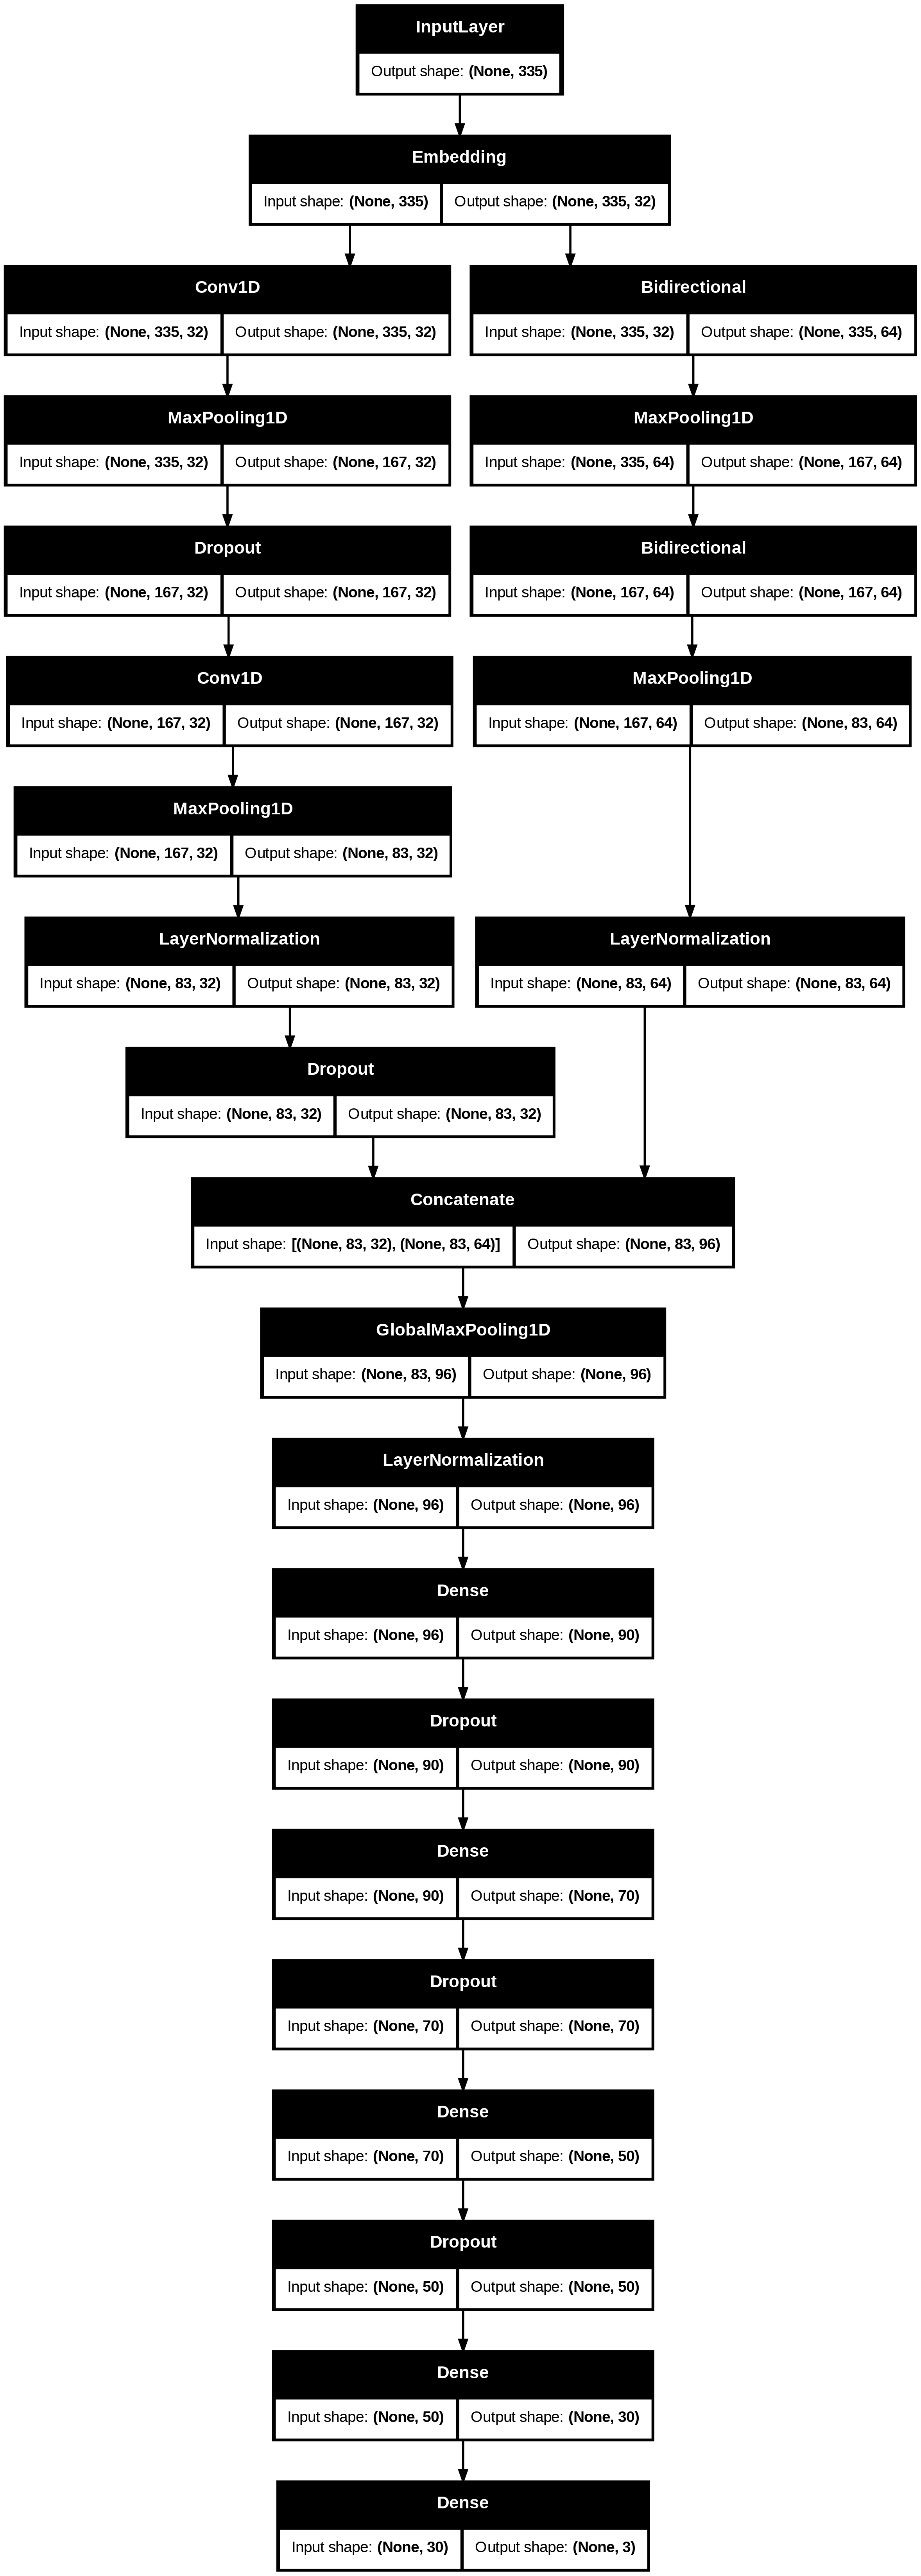

In [23]:
dot_img_file='model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

##Define model checkpoint and training

In [24]:
callback_model = tf.keras.callbacks.ModelCheckpoint('model_cnn_bilstm.keras', monitor='val_loss')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train,validation_data=(x_val, y_val),epochs=10,batch_size=128,callbacks=[callback_model, early_stopping])


Epoch 1/10
354/354 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 312s 853ms/step - accuracy: 0.6587 - loss: 0.8440 - val_accuracy: 0.7846 - val_loss: 0.5435
Epoch 2/10
354/354 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 313s 829ms/step - accuracy: 0.7865 - loss: 0.5442 - val_accuracy: 0.7915 - val_loss: 0.5150
Epoch 3/10
354/354 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 320s 823ms/step - accuracy: 0.8028 - loss: 0.4936 - val_accuracy: 0.7998 - val_loss: 0.5049
Epoch 4/10
354/354 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 291s 823ms/step - accuracy: 0.8141 - loss: 0.4690 - val_accuracy: 0.7997 - val_loss: 0.5002
Epoch 5/10
354/354 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 320s 819ms/step - accuracy: 0.8267 - loss: 0.4384 - val_accuracy: 0.7994 - val_loss: 0.5034
Epoch 6/10
354/354 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 327s 831ms/step - accuracy: 0.8330 - loss: 0.4253 - val_accu

In [ ]:
model.load_weights('model_cnn_bilstm.keras')
model.evaluate(x_test,y_test)

##Inference Model with input test

In [25]:
def preprocess_raw_input(raw_input, tokenizer):
    input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(raw_input))
    input_text_pre = " ".join(input_text_pre)
    input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
    print("Text preprocessed: ", input_text_pre_accent)
    tokenized_data_text = tokenizer.texts_to_sequences([input_text_pre_accent])
    # Changed maxlen to 335 to match the training data shape
    vec_data = pad_sequences(tokenized_data_text, padding='post', maxlen=335)
    return vec_data

def inference_model(input_feature, model):
  output = model(input_feature).numpy()[0]
  result = output.argmax()
  conf = float(output.max())
  # label_dict = defaultdict(lambda: -2)  # G√°n -2 cho c√°c kh√≥a kh√¥ng t·ªìn t·∫°i
  # label_dict['ti√™u c·ª±c'] = -1
  # label_dict['t√≠ch c·ª±c'] = 1
  # label_dict['trung l·∫≠p'] = 0
  label_dict = {'ti√™u c·ª±c':0, 'trung l·∫≠p':1, 't√≠ch c·ª±c':2}
  label = list(label_dict.keys())
  return label[int(result)], conf

def prediction(raw_input,tokenizer,model):
  input_model = preprocess_raw_input(raw_input,tokenizer_data)
  result, conf = inference_model(input_model, model)
  return result, conf

my_model = generate_model()
my_model = load_model('model_cnn_bilstm.keras')
with open(r"tokenizer_data.pkl", "rb") as input_file:
    my_tokenizer = pickle.load(input_file)

print(prediction("s·ªØa chua ngon l·∫Øm",my_tokenizer,my_model))

Text preprocessed:  s·ªØa_chua ngon l·∫Øm
('t√≠ch c·ª±c', 0.9463092088699341)


In [26]:
while(True):
  text = input()
  if text == "end":
    break
  else:
    # Convert the prediction result to a string using str()
    print(str(prediction(text,my_tokenizer,my_model)[0])+"\n")

Anh Ch·ªã thi cu·ªëi k·ª≥ cho t·ªët!
Text preprocessed:  anh_ch·ªã thi cu·ªëi k·ª≥ cho t·ªët
t√≠ch c·ª±c

N√™n mua con n√†y k ae
Text preprocessed:  n√™n mua con n√†y k ae
ti√™u c·ª±c

Ph·∫£i chi ƒëi thi c≈©ng nh∆∞ l√∫c ch∆°i Kahoot gi·∫≠t give away 
Text preprocessed:  ph·∫£i chi ƒëi thi c≈©ng nh∆∞ l√∫c ch∆°i kahoot gi·∫≠t give away
ti√™u c·ª±c

 ∆ØU ƒê√ÉI SI√äU HOT D√ÄNH CHO C√ÅC B·∫†N SINH VI√äN 
Text preprocessed:  ∆∞u_ƒë√£i si√™u hot d√†nh cho c√°c b·∫°n sinh_vi√™n
t√≠ch c·ª±c

MENU ƒê·ªíNG GI√Å 23K (ùê¶ùê¢ùê± ùüê ùê¶ùê®ÃÅùêß)
Text preprocessed:  menu ƒë·ªìng gi√° 23k ùê¶ùê¢ùê± ùüê ùê¶ùê® ÃÅ ùêß
ti√™u c·ª±c

t√¥i t√™n h√πng
Text preprocessed:  t√¥i t√™n h√πng
trung l·∫≠p

ƒê√£ th·∫ø d·∫°o n√†y s·∫°c c·∫£m gi√°c n√≥ ch·∫≠m h∆°n tr∆∞·ªõc c·ª° n·ª≠a ti·∫øng m·ªõi ƒë·∫ßy pin.
Text preprocessed:  ƒë√£ th·∫ø d·∫°o n√†y s·∫°c c·∫£m_gi√°c n√≥ ch·∫≠m h∆°n tr∆∞·ªõc c·ª° n·ª≠a ti·∫øng m·ªõi ƒë·∫ßy pin
ti√™u c·ª±c

C√°c b√°c trong nh√≥m cho em h·ªèi sao em ƒëang s·∫°c m√† n√≥ v·

KeyboardInterrupt: Interrupted by user